In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder
import sklearn
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv("data.csv")
df.head(5)

esg_score21          esg_class21  environ_score21   environ_class21  \
0         20.0     Weak performance              0.0  Weak performance   
1         26.0     Weak performance             18.0  Weak performance   
2         31.0  Limited performance             20.0  Weak performance   
3         24.0     Weak performance              9.0  Weak performance   
4         24.0     Weak performance             15.0  Weak performance   

   social_score21    social_class21  govern_score21       govern_class21  \
0            17.0  Weak performance            36.0  Limited performance   
1            22.0  Weak performance            40.0  Limited performance   
2            29.0  Weak performance            48.0  Limited performance   
3            21.0  Weak performance            38.0  Limited performance   
4            19.0  Weak performance            39.0  Limited performance   

   turnover21 country  ... esg_exe_remuneration esg_respect_humanr  \
0    490490.0     USA  ...                 28.0               22.0   
1   2122245.0     USA  ...                 43.0               31.0   
2    102731.0     USA  ...                 46.0               46.0   
3     54522.0     USA  ...                 29.0               36.0   
4        83.0     USA  ...                 38.0               32.0   

   esg_human_rights  esg_respect_freedom esg_non_discrimination  \
0              25.0                 22.0                   27.0   
1              28.0                 23.0                   33.0   
2              34.0                 24.0                   47.0   
3              27.0                 23.0                   35.0   
4              25.0                 18.0                   30.0   

   esg_physical_risk  esg_energy_transition  esg_carbon_emission1  \
0                0.0                    0.0                   NaN   
1               43.0                   13.0                2300.0   
2               39.0                   10.0                 748.0   
3                1.0                    5.0                6222.0   
4                1.0                   11.0                 326.0   

  esg_carbon_emission2 esg_carbon_emission1_2  
0                  NaN                 5537.0  
1              40984.0                43284.0  
2               7379.0                 8128.0  
3              18748.0                24970.0  
4               1363.0                 1689.0  

[5 rows x 110 columns]

### Tamaño de mi muestra

In [4]:
df.shape

(22581, 110)

Analisis general de la muestra

## Descriptivo de cada una de las variables 

In [7]:
# Guardo la configuración original
original_max_columns = pd.get_option('display.max_columns')

# Cambio la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)

print(df.describe())

# Restauro la configuración original
pd.set_option('display.max_columns', original_max_columns)

        esg_score21  environ_score21  social_score21  govern_score21  \
count  22442.000000     22442.000000    22442.000000    22442.000000   
mean      23.420105        14.759469       23.159077       31.274485   
std        6.599910         9.845583        6.703077        7.621924   
min        9.000000         0.000000        8.000000        2.000000   
25%       19.000000         8.000000       19.000000       26.000000   
50%       23.000000        12.000000       22.000000       31.000000   
75%       26.000000        19.000000       26.000000       36.000000   
max       76.000000        87.000000       84.000000       75.000000   

         turnover21      firm_age    group_size    size_class  other_acount  \
count  2.189600e+04  22536.000000  2.257200e+04  22581.000000  22581.000000   
mean   1.265211e+06     44.338791  1.375675e+05      0.574332      0.004340   
std    9.780713e+06     39.841879  3.786195e+05      0.494455      0.065737   
min    0.000000e+00     -3.000000  

La mayoria de las empresas tienen unos alto margenes de rendimiento, utilidad, ingresos pero en promedio tienen un esg score debil

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22581 entries, 0 to 22580
Columns: 110 entries, esg_score21 to esg_carbon_emission1_2
dtypes: float64(94), int64(6), object(10)
memory usage: 19.0+ MB
None


## Analisis de valores nulos

In [11]:
def mostrar_nans(df):
    # Calculo el porcentaje de valores faltantes por columna
    porcentaje_nan = df.isna().mean() * 100
    
    # Filtro solo las columnas con valores faltantes
    porcentaje_nan = porcentaje_nan[porcentaje_nan > 0]
    
    # Guardo la configuración original de pandas
    original_max_rows = pd.get_option('display.max_rows')
    
    # Configuro pandas para mostrar todas las filas
    pd.set_option('display.max_rows', None)
    
    print(porcentaje_nan)
    
    # Restauro la configuración original de pandas
    pd.set_option('display.max_rows', original_max_rows)

In [12]:
mostrar_nans(df)

esg_score21                        0.615562
esg_class21                        0.615562
environ_score21                    0.615562
environ_class21                    0.615562
social_score21                     0.615562
social_class21                     0.615562
govern_score21                     0.615562
govern_class21                     0.615562
turnover21                         3.033524
firm_age                           0.199283
group_size                         0.039857
activity                           2.347106
type_event                        47.398255
audit_status21                    65.129977
ebt21                              4.729640
net_income21                       5.336345
cash_flow21                       26.349586
total_assets21                     3.006953
equity21                           3.529516
current_ratio21                    9.512422
margen_profit                      6.598468
gross_profit                      25.711882
roe21                           

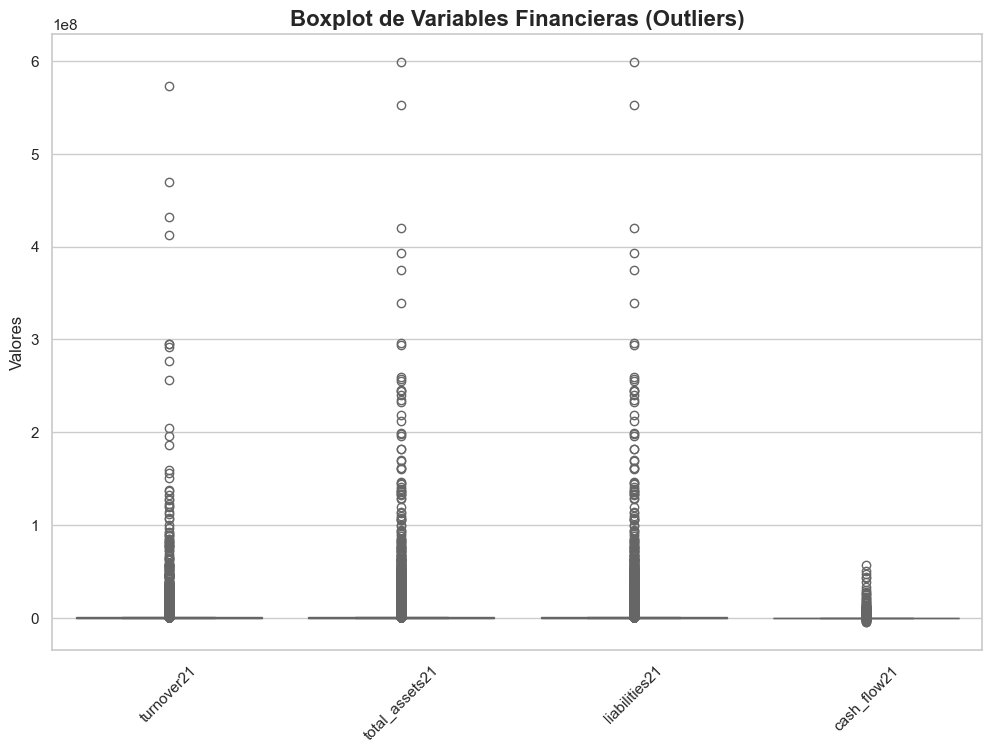

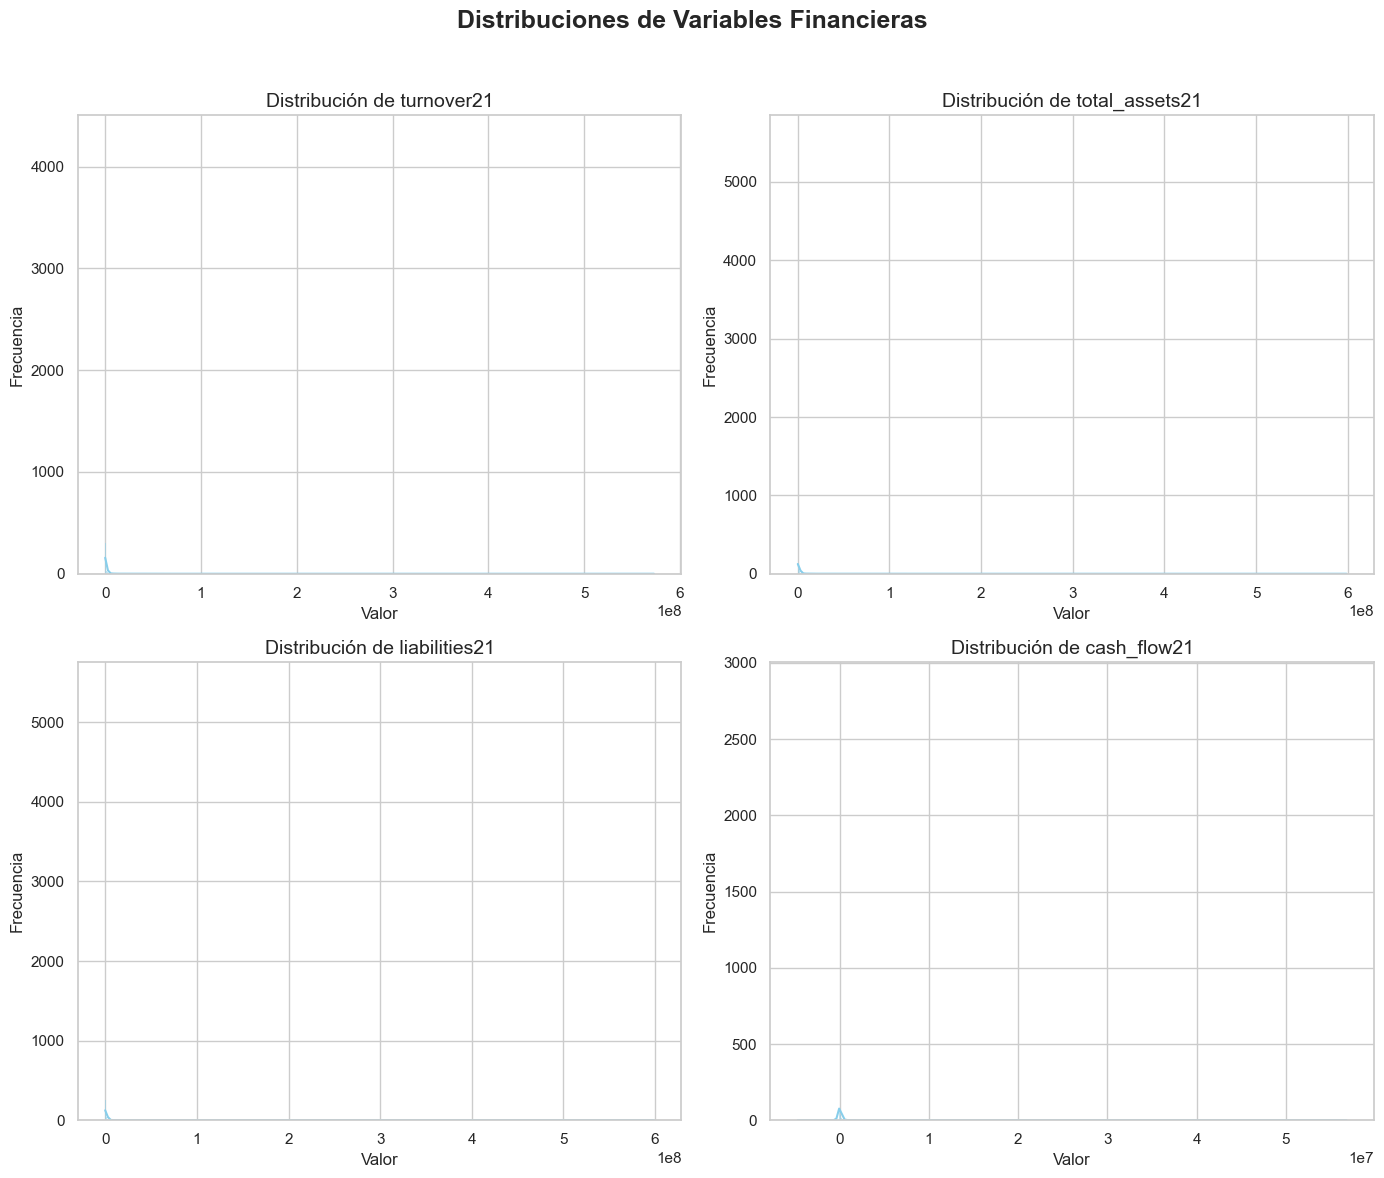

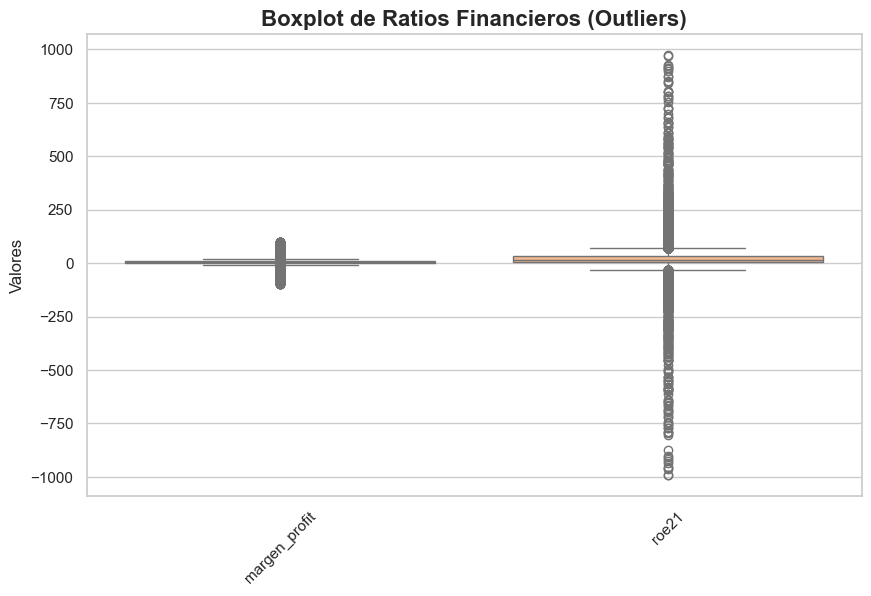

C:\Users\34651\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


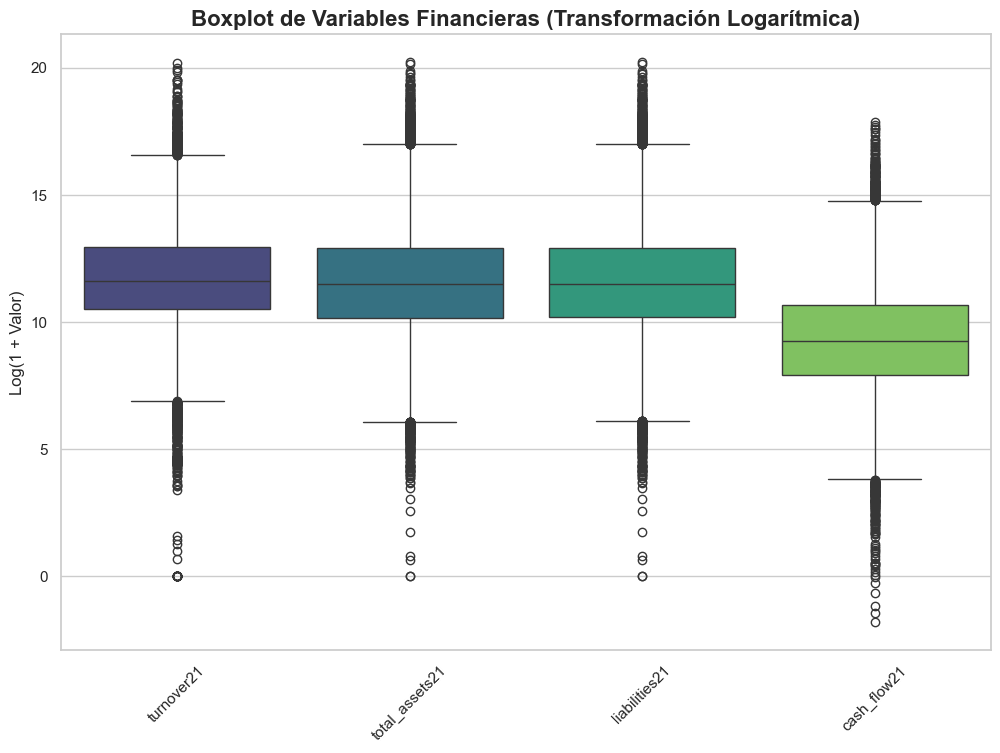

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración del estilo
sns.set_theme(style="whitegrid", palette="muted")

# Asumiendo que tienes un DataFrame llamado 'df'
variables_financieras = ['turnover21', 'total_assets21', 'liabilities21', 'cash_flow21']
ratios_financieros = ['margen_profit', 'roe21']

# 1. Boxplots para Variables Financieras
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[variables_financieras], palette="coolwarm")
plt.title('Boxplot de Variables Financieras (Outliers)', fontsize=16, fontweight='bold')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

# 2. Histogramas para Distribuciones
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Distribuciones de Variables Financieras', fontsize=18, fontweight='bold')

for i, var in enumerate(variables_financieras):
    row, col = i // 2, i % 2
    sns.histplot(df[var], kde=True, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Distribución de {var}', fontsize=14)
    axes[row, col].set_xlabel('Valor')
    axes[row, col].set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3. Boxplots para Ratios Financieros
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[ratios_financieros], palette="pastel")
plt.title('Boxplot de Ratios Financieros (Outliers)', fontsize=16, fontweight='bold')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

# 4. Log-Transformación para Variables Financieras
import numpy as np

df_log = df[variables_financieras].apply(lambda x: np.log1p(x))  # Log(1 + x)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_log, palette="viridis")
plt.title('Boxplot de Variables Financieras (Transformación Logarítmica)', fontsize=16, fontweight='bold')
plt.ylabel('Log(1 + Valor)')
plt.xticks(rotation=45)
plt.show()

## Distribucion de las variables numericas 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que tienes un DataFrame llamado 'df' con las columnas ESG
variables = ['esg_score21', 'environ_score21', 'social_score21', 'govern_score21']

# Configurar Seaborn
sns.set_theme(style="whitegrid", palette="deep")

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Distribución de Puntajes ESG', fontsize=20, fontweight='bold')

# Crear gráficos para cada variable
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    
    # Histograma con curva KDE
    sns.histplot(data=df, x=var, kde=True, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Distribución de {var}', fontsize=14, fontweight='bold')
    axes[row, col].set_xlabel('Puntaje', fontsize=12)
    axes[row, col].set_ylabel('Frecuencia', fontsize=12)
    
    # Añadir línea de media
    mean = df[var].mean()
    axes[row, col].axvline(mean, color='red', linestyle='dashed', linewidth=2)
    axes[row, col].text(mean, axes[row, col].get_ylim()[1] * 0.9, f'Media: {mean:.2f}', 
                        horizontalalignment='center', color='red')

    # Añadir línea de mediana
    median = df[var].median()
    axes[row, col].axvline(median, color='green', linestyle='dashed', linewidth=2)
    axes[row, col].text(median, axes[row, col].get_ylim()[1] * 0.8, f'Mediana: {median:.2f}', 
                        horizontalalignment='center', color='green')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Guardar la figura
plt.savefig('distribucion_puntajes_esg.png', dpi=300, bbox_inches='tight')
plt.close()

# Crear un gráfico de violín con etiquetas mejoradas
plt.figure(figsize=(12, 8))
sns.violinplot(data=df[variables])
plt.title('Comparación de Distribuciones de Puntajes ESG', fontsize=16, fontweight='bold')
plt.ylabel('Puntaje', fontsize=12)
plt.xticks(ticks=range(len(variables)), labels=['ESG Score', 'Environmental', 'Social', 'Governance'], fontsize=12)

# Guardar el gráfico de violín
plt.savefig('comparacion_puntajes_esg_violin.png', dpi=300, bbox_inches='tight')
plt.close()


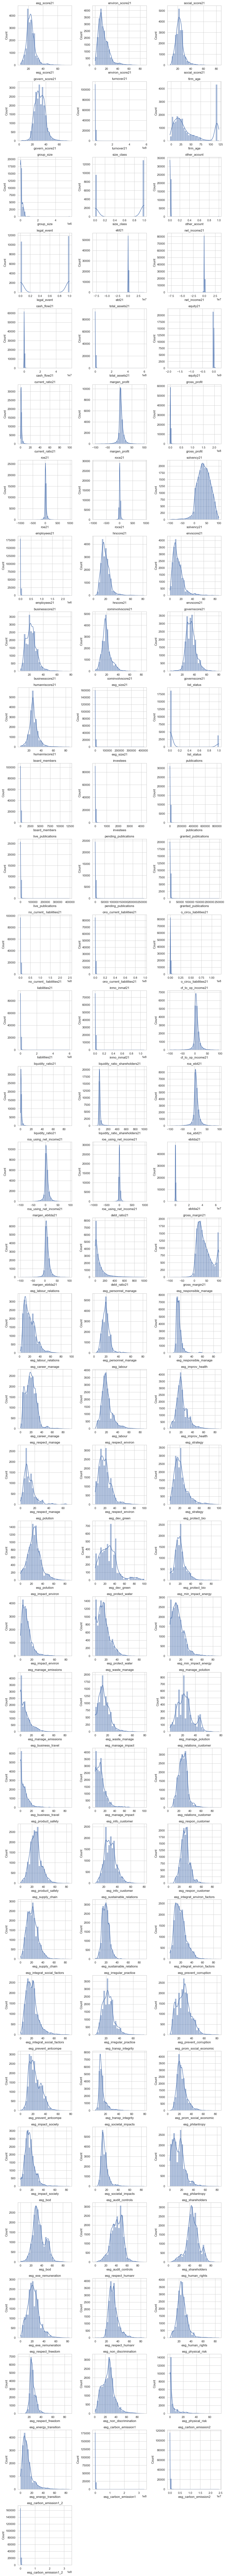

In [16]:
import math
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Tengo 99 columnas en numeric_cols
n_cols = 3  # Numero de columnas por fila
n_rows = math.ceil(len(numeric_cols) / n_cols)  # Numero de filas necesarias para cubrir todas las columnas

# Ajusto el tamaño de la figura dependiendo del número de filas y columnas
plt.figure(figsize=(12, 4 * n_rows))  # Ajusto la altura de la figura según el número de filas

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

# Ajusto el espaciado entre las subgráficas para evitar que se monten
plt.tight_layout()
plt.show()

Puedo ver que hay muchas vriables con valores extemos y otras que tienen tendendecia a ser una normal 

## Analisis de correlacion 

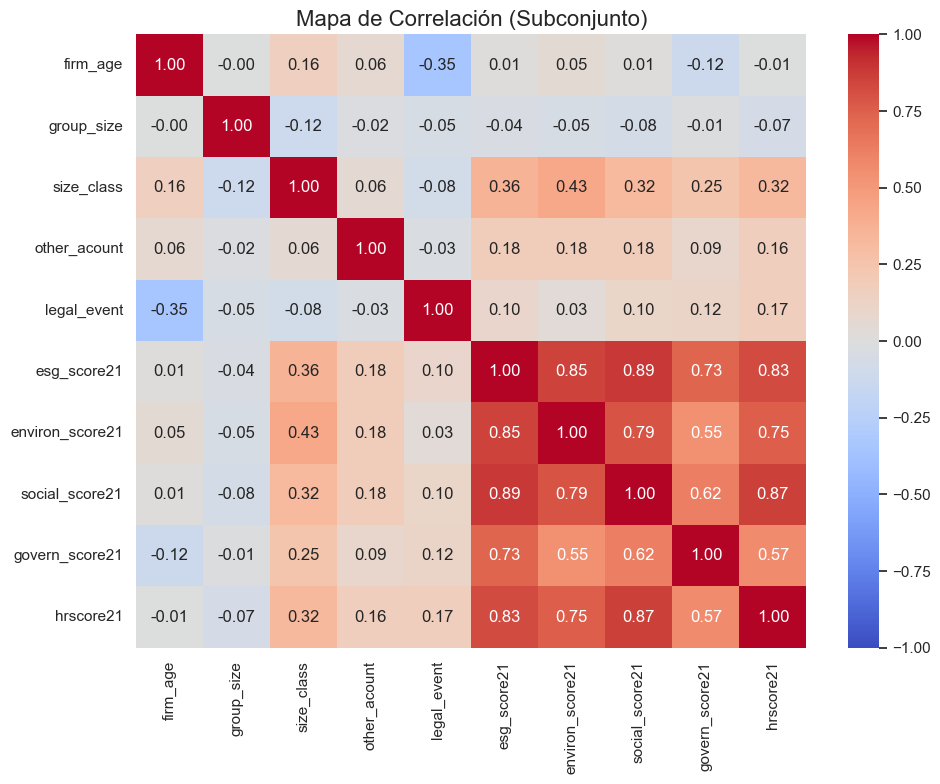

In [19]:
variables_y = [
    'firm_age', 'group_size', 'size_class', 'other_acount', 'legal_event',
    'turnover21', 'ebt21', 'net_income21', 'cash_flow21', 'total_assets21',
    'equity21', 'current_ratio21', 'margen_profit', 'gross_profit', 'roe21',
    'roce21', 'solvency21', 'employees21', 'list_status', 'board_members',
    'investees', 'publications', 'live_publications', 'pending_publications',
    'granted_publications', 'ono_current_liabilities21',
    'o_circu_liabilities21', 'liabilities21', 'inmo_inmat21', 'cf_to_op_income21',
    'liquidity_ratio21', 'liquidity_ratio_shareholders21', 'roa_ebit21', 
    'roa_using_net_income21', 'roe_using_net_income21', 'ebitda21', 'margen_ebitda21',
    'debt_ratio21', 'gross_margin21']

variables_x = [
    'esg_score21', 'environ_score21', 'social_score21', 'govern_score21', 'hrscore21',
    'envscore21', 'businesscore21', 'cominvolvscore21', 'governscore21', 'humanriscore21',
    'esg_size21', 'esg_labour_relations', 'esg_personnel_manage', 'esg_responsible_manage',
    'esg_career_manage', 'esg_labour', 'esg_improv_health', 'esg_respect_manage', 
    'esg_respect_environ', 'esg_strategy', 'esg_polution', 'esg_dev_green', 'esg_protect_bio',
    'esg_impact_environ', 'esg_protect_water', 'esg_min_impact_energy', 'esg_manage_emissions',
    'esg_waste_manage', 'esg_manage_polution', 'esg_business_travel', 'esg_manage_impact',
    'esg_relations_customer', 'esg_product_safety', 'esg_info_customer', 'esg_respon_customer',
    'esg_supply_chain', 'esg_sustainable_relations', 'esg_integrat_environ_factors',
    'esg_integrat_social_factors', 'esg_irregular_practice', 'esg_prevent_corruption',
    'esg_prevent_antcompe', 'esg_transp_integrity', 'esg_prom_social_economic', 'esg_impact_society',
    'esg_societal_impacts', 'esg_philantropy', 'esg_bod', 'esg_audit_controls', 'esg_shareholders',
    'esg_exe_remuneration', 'esg_respect_humanr', 'esg_human_rights', 'esg_respect_freedom',
    'esg_non_discrimination', 'esg_physical_risk', 'esg_energy_transition', 'esg_carbon_emission1',
    'esg_carbon_emission2', 'esg_carbon_emission1_2']

# Selecciono un subconjunto de variables
subset_vars = variables_y[:5] + variables_x[:5]
correlation_subset = df[subset_vars].corr()

# Creo el mapa de calor con el subconjunto
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset, 
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            vmin=-1, 
            vmax=1)

plt.title('Mapa de Correlación (Subconjunto)', fontsize=16)
plt.tight_layout()
plt.show()

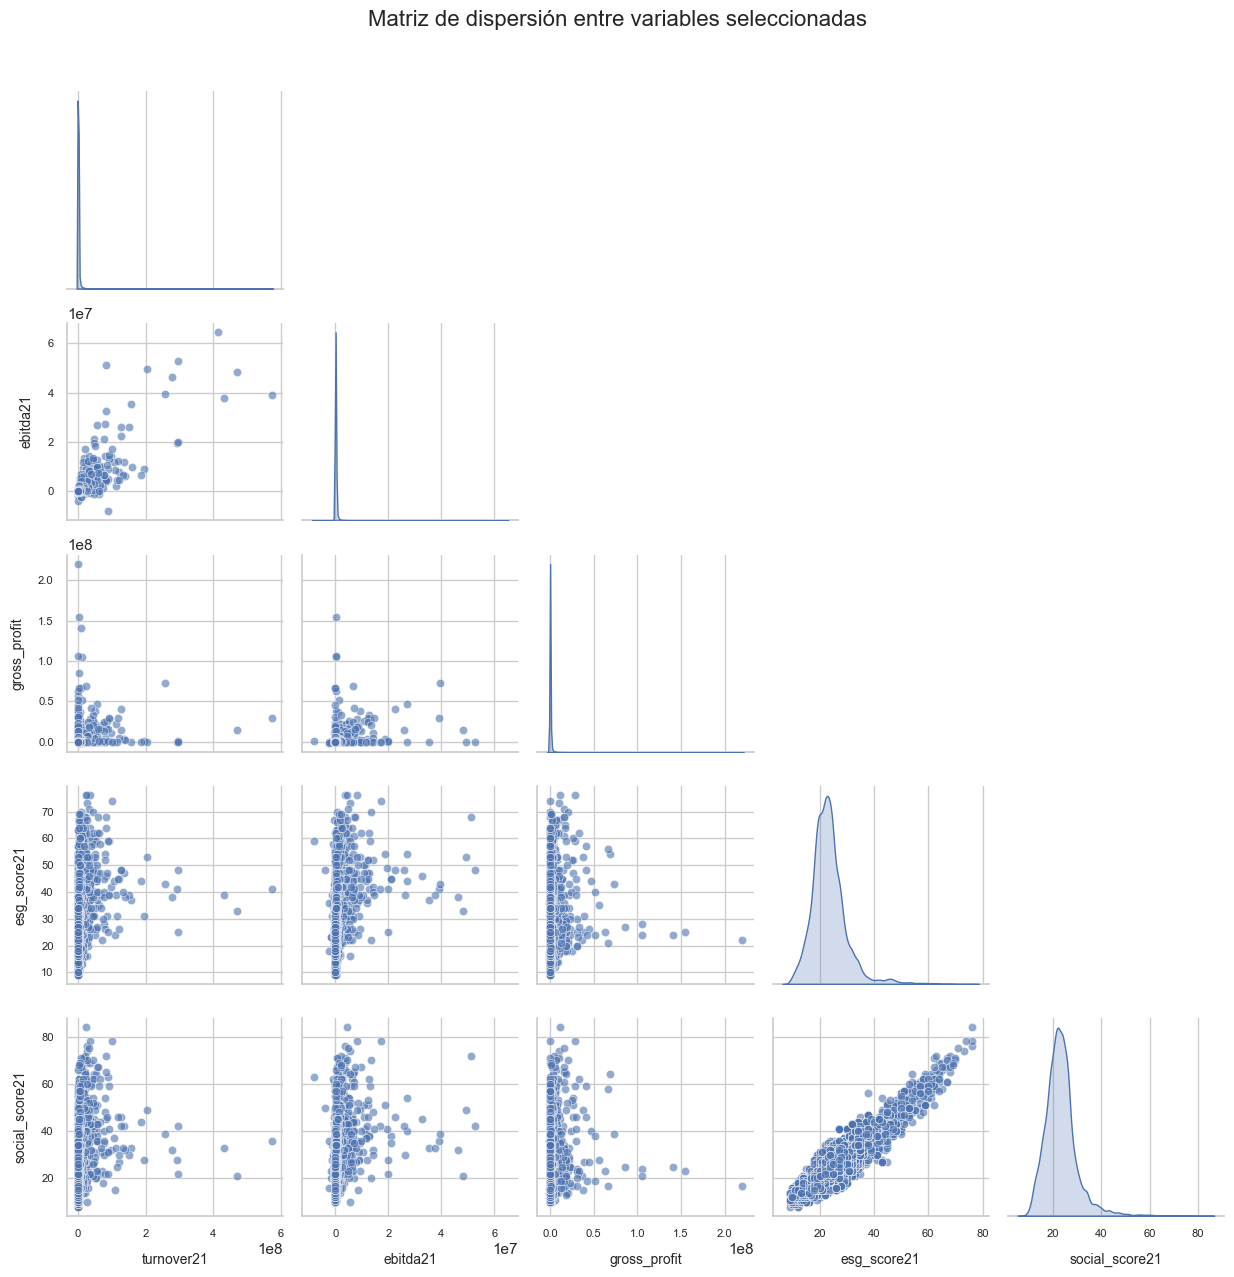

In [20]:
subset_variables = ['turnover21', 'ebitda21', 'gross_profit', 'esg_score21', 'social_score21']

# Configuroel estilo 
sns.set_style("whitegrid")
sns.set_palette("deep")

g = sns.pairplot(df[subset_variables], 
                 kind='scatter', 
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 'edgecolor': 'w', 'linewidth': 0.5},
                 diag_kws={'fill': True},  # Cambiado de 'shade' a 'fill'
                 corner=True,
                 height=2.5)

g.fig.suptitle("Matriz de dispersión entre variables seleccionadas", 
               fontsize=16, 
               y=1.02)

# Ajusto los ejes y las etiquetas
for ax in g.axes.flat:
    if ax is not None:  # Verificar si el eje existe
        if ax.get_xlabel():
            ax.set_xlabel(ax.get_xlabel(), fontsize=10, labelpad=10)
        if ax.get_ylabel():
            ax.set_ylabel(ax.get_ylabel(), fontsize=10, labelpad=10)
        ax.tick_params(labelsize=8)

# Ajusto el espacio entre subplots
plt.tight_layout()
plt.show()


In [21]:
import plotly.express as px

# correlacion entre el turnover y esg
fig = px.scatter(df, x='turnover21', y='esg_score21', title="Dispersión interactiva: Turnover vs ESG Score")
fig.update_layout(xaxis_title="Turnover 21", yaxis_title="ESG Score 21")
fig.show()

## Analisis de variables categoricas

C:\Users\34651\AppData\Local\Temp\ipykernel_5688\648649148.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\34651\AppData\Local\Temp\ipykernel_5688\648649148.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\34651\AppData\Local\Temp\ipykernel_5688\648649148.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\34651\AppData\Local\Temp\ipykernel_5688\648649148.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\34651\AppData\Local\Temp\ipykernel_5688\648649148.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\34651\AppDa

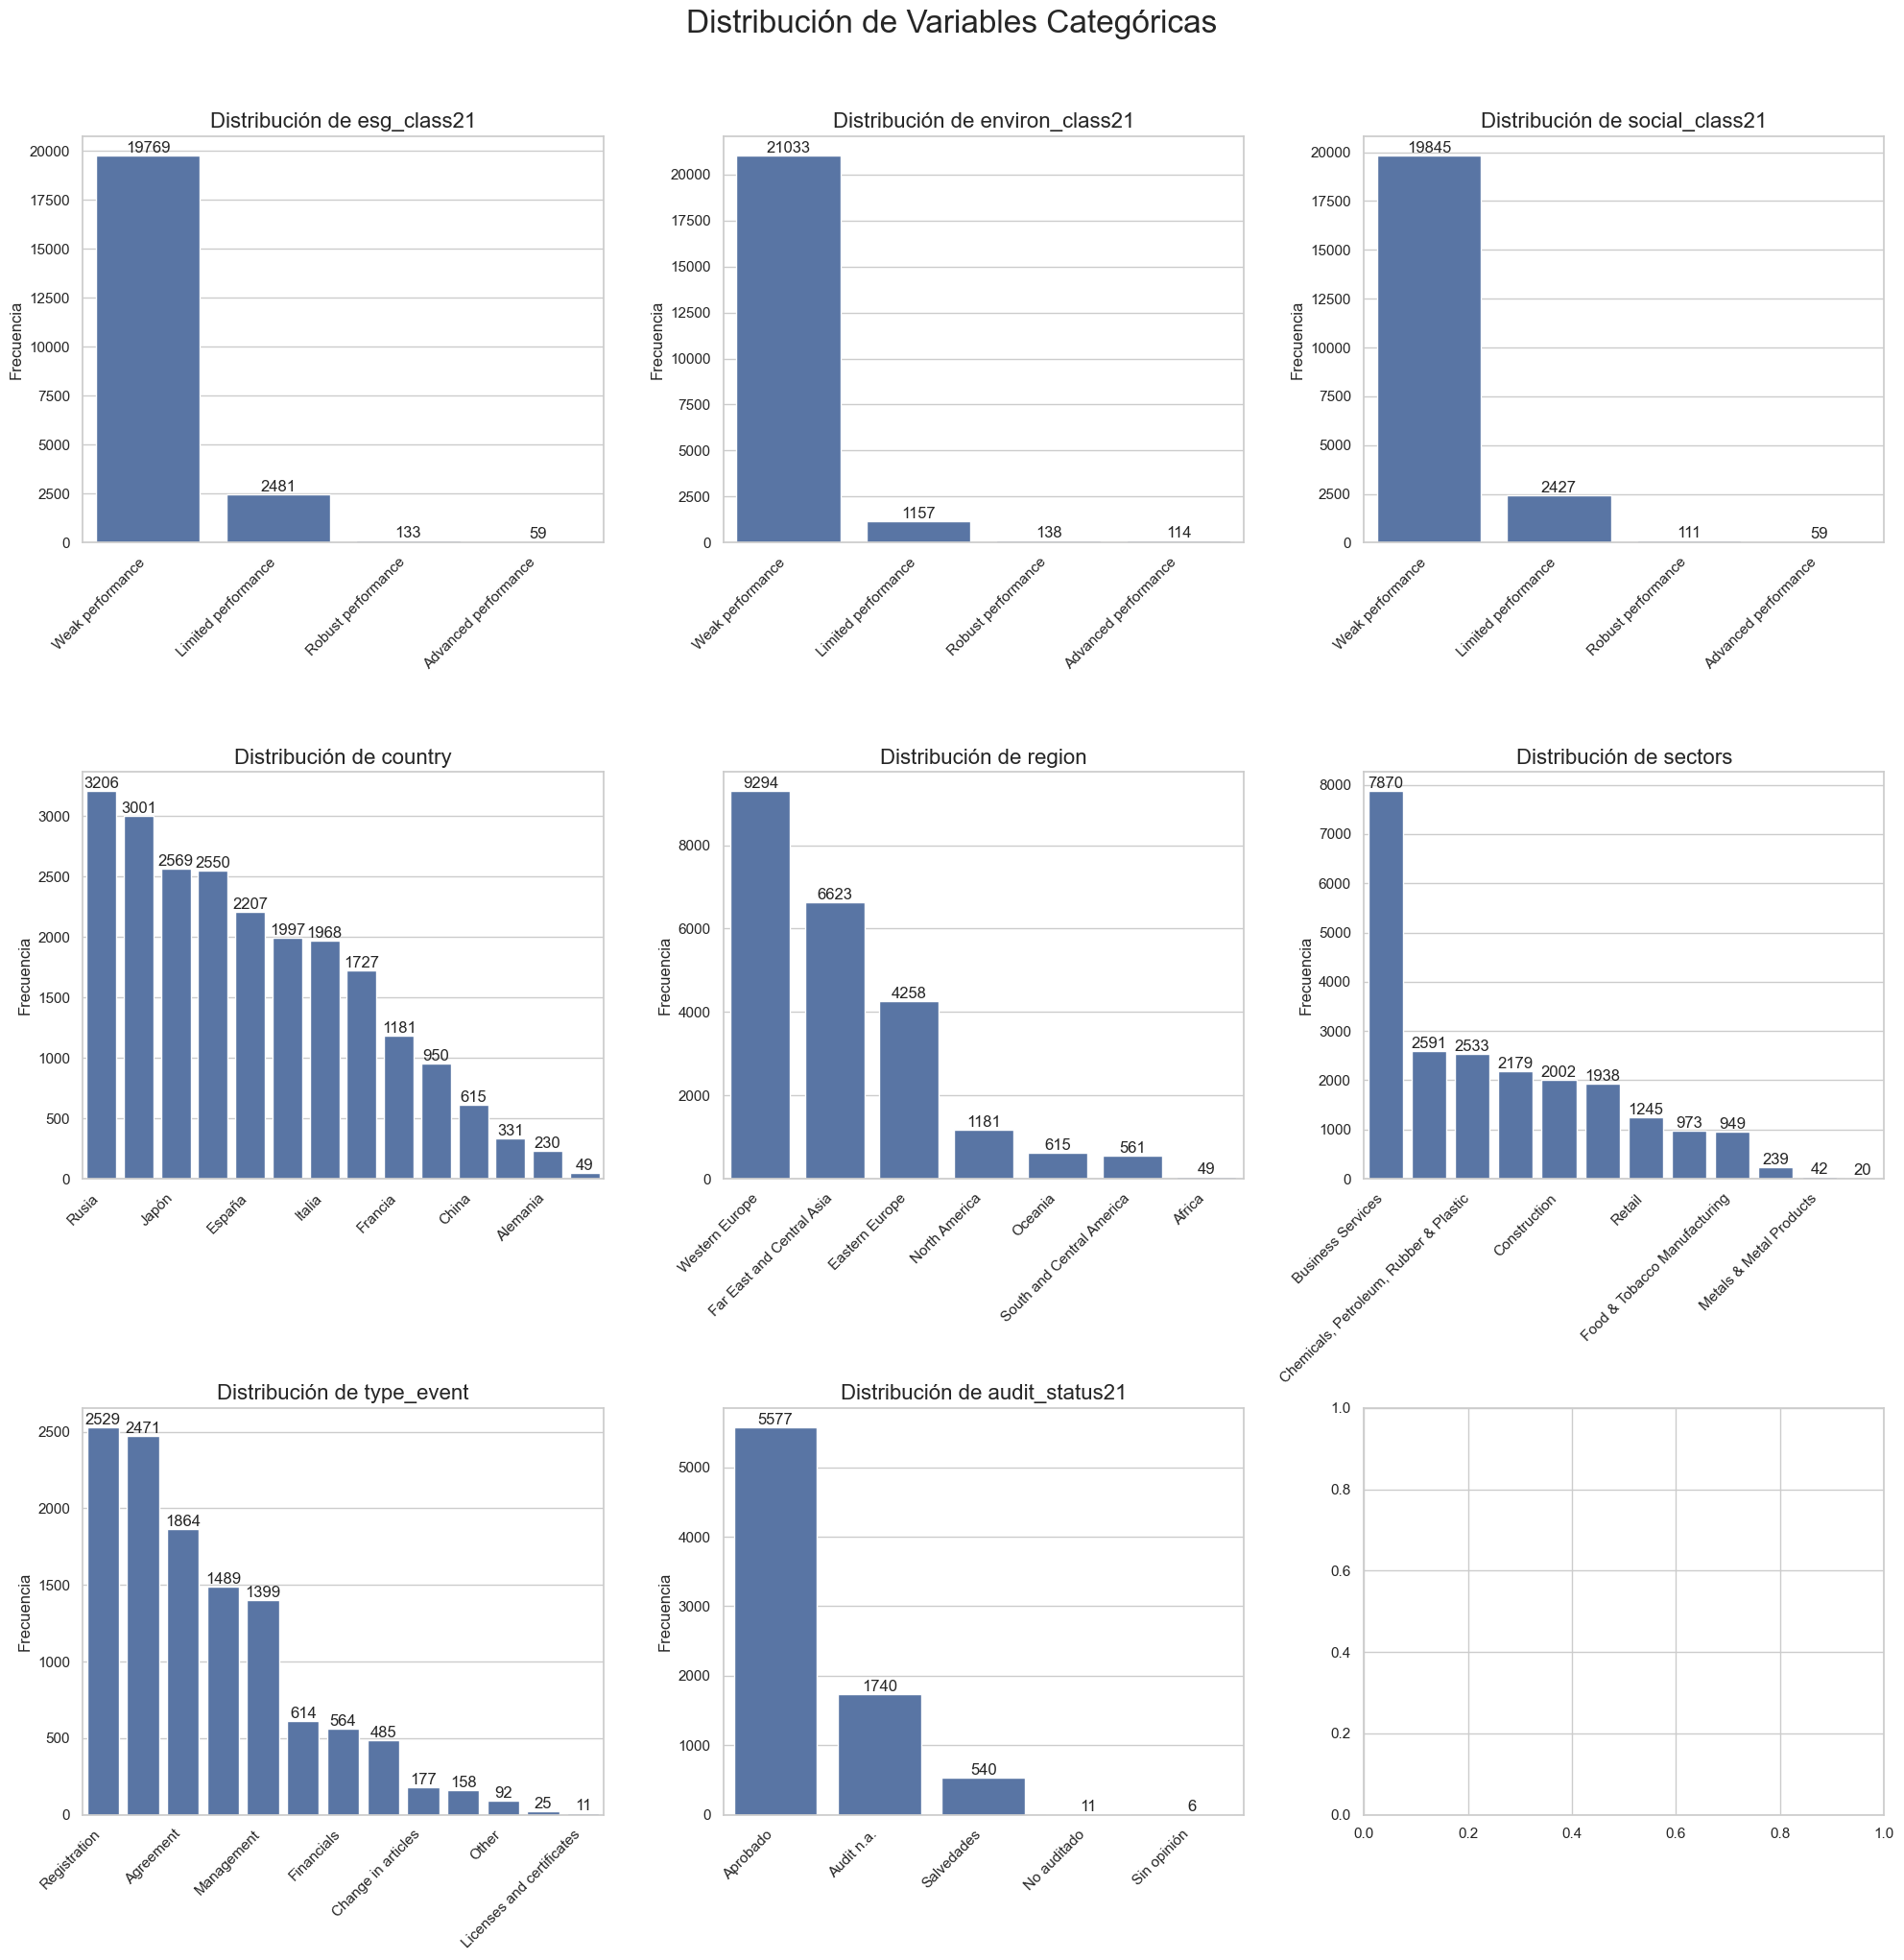

In [23]:
categorical_cols = [
    'esg_class21', 'environ_class21', 'social_class21', 
    'country', 'region', 'sectors', 'type_event', 'audit_status21']

# Configuro del estilo de seaborn
sns.set_style("whitegrid")
sns.set_palette("deep")

# Creao una figura con subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Distribución de Variables Categóricas', fontsize=24, y=1.02)

# Aplano la matriz de ejes para facilitar la iteración
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Calcular las frecuencias
    value_counts = df[col].value_counts()
    
    # Creo el gráfico de barras
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    
    # Personalizp el gráfico
    axes[i].set_title(f'Distribución de {col}', fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia', fontsize=12)
    
    # Roto las etiquetas del eje x para mejor legibilidad
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Ajusto el número de etiquetas en el eje x si hay muchas categorías
    if len(value_counts) > 10:
        axes[i].set_xticks(axes[i].get_xticks()[::2])
    
    # Añado valores en la parte superior de cada barra
    for j, v in enumerate(value_counts.values):
        axes[i].text(j, v, str(v), ha='center', va='bottom')

# Ajusto el diseño
plt.tight_layout()
plt.show()


In [24]:
def mostrar_nans(df):
    # Calculo el porcentaje de valores faltantes por columna
    porcentaje_nan = df.isna().mean() * 100
    
    # Filtro solo las columnas con valores faltantes
    porcentaje_nan = porcentaje_nan[porcentaje_nan > 0]
    
    # Guardo la configuración original de pandas
    original_max_rows = pd.get_option('display.max_rows')
    
    # Configuro pandas para mostrar todas las filas
    pd.set_option('display.max_rows', None)
    
    print(porcentaje_nan)
    
    # Restauro la configuración original de pandas
    pd.set_option('display.max_rows', original_max_rows)

In [25]:
mostrar_nans(df)

esg_score21                        0.615562
esg_class21                        0.615562
environ_score21                    0.615562
environ_class21                    0.615562
social_score21                     0.615562
social_class21                     0.615562
govern_score21                     0.615562
govern_class21                     0.615562
turnover21                         3.033524
firm_age                           0.199283
group_size                         0.039857
activity                           2.347106
type_event                        47.398255
audit_status21                    65.129977
ebt21                              4.729640
net_income21                       5.336345
cash_flow21                       26.349586
total_assets21                     3.006953
equity21                           3.529516
current_ratio21                    9.512422
margen_profit                      6.598468
gross_profit                      25.711882
roe21                           

In [26]:
# Calculamos la media de empresas por región
region_media = df.groupby('country').size().reset_index(name='media_empresas')

# Calculamos la media de empresas por región y sector
region_sector_media = df.groupby(['country', 'sectors']).size().reset_index(name='media_empresas_sector')

# Ver los resultados
print("Media de empresas por región:")
print(region_media)

print("\nMedia de empresas por región y sector:")
print(region_sector_media)

Media de empresas por región:
      country  media_empresas
0    Alemania            1968
1   Australia             615
2      Brasil             230
3       China            1997
4      España            2569
5     Francia            2207
6       India             950
7      Italia            2550
8       Japón            3001
9      México             331
10    Polonia            1727
11      Rusia            3206
12  Sudáfrica              49
13        USA            1181

Media de empresas por región y sector:
      country                                      sectors  \
0    Alemania              Biotechnology and Life Sciences   
1    Alemania                            Business Services   
2    Alemania       Chemicals, Petroleum, Rubber & Plastic   
3    Alemania                            Computer Software   
4    Alemania                                 Construction   
..        ...                                          ...   
134       USA  Industrial, Electric & Electron

C:\Users\34651\AppData\Local\Temp\ipykernel_5688\3710273337.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\34651\AppData\Local\Temp\ipykernel_5688\3710273337.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




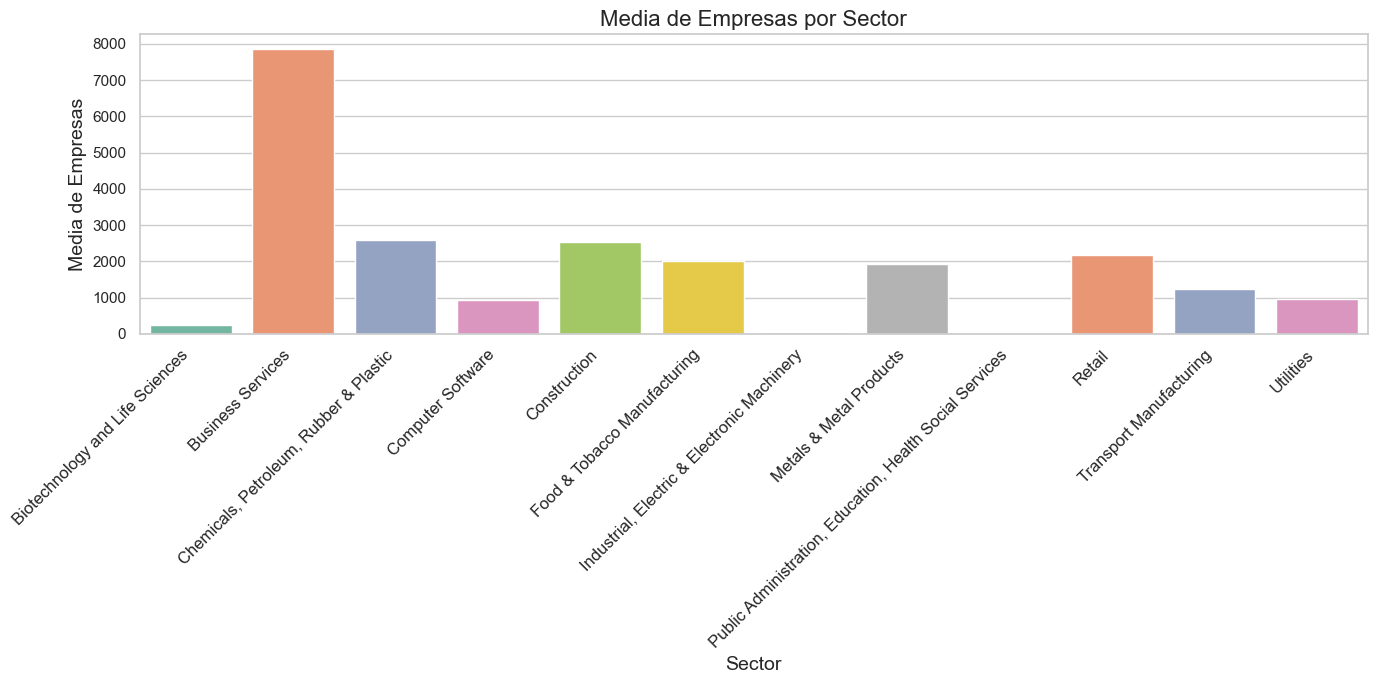

In [27]:
# Calculo la media de empresas por sector
sector_media = df.groupby('sectors').size().reset_index(name='media_empresas_sector')

# Configuro el gráfico con seaborn
plt.figure(figsize=(14, 7))  # Aumentamos el tamaño de la figura para más espacio
sns.barplot(data=sector_media, x='sectors', y='media_empresas_sector', palette='Set2', ci=None)

# Titulos y etiquetas
plt.title('Media de Empresas por Sector', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Media de Empresas', fontsize=14)

# Ajusto las etiquetas para que sean legibles y evitar que se superpongan
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotamos las etiquetas a 45 grados

# Ajusto los márgenes para evitar que se recorten las etiquetas
plt.tight_layout()

plt.show()


C:\Users\34651\AppData\Local\Temp\ipykernel_5688\3316105808.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




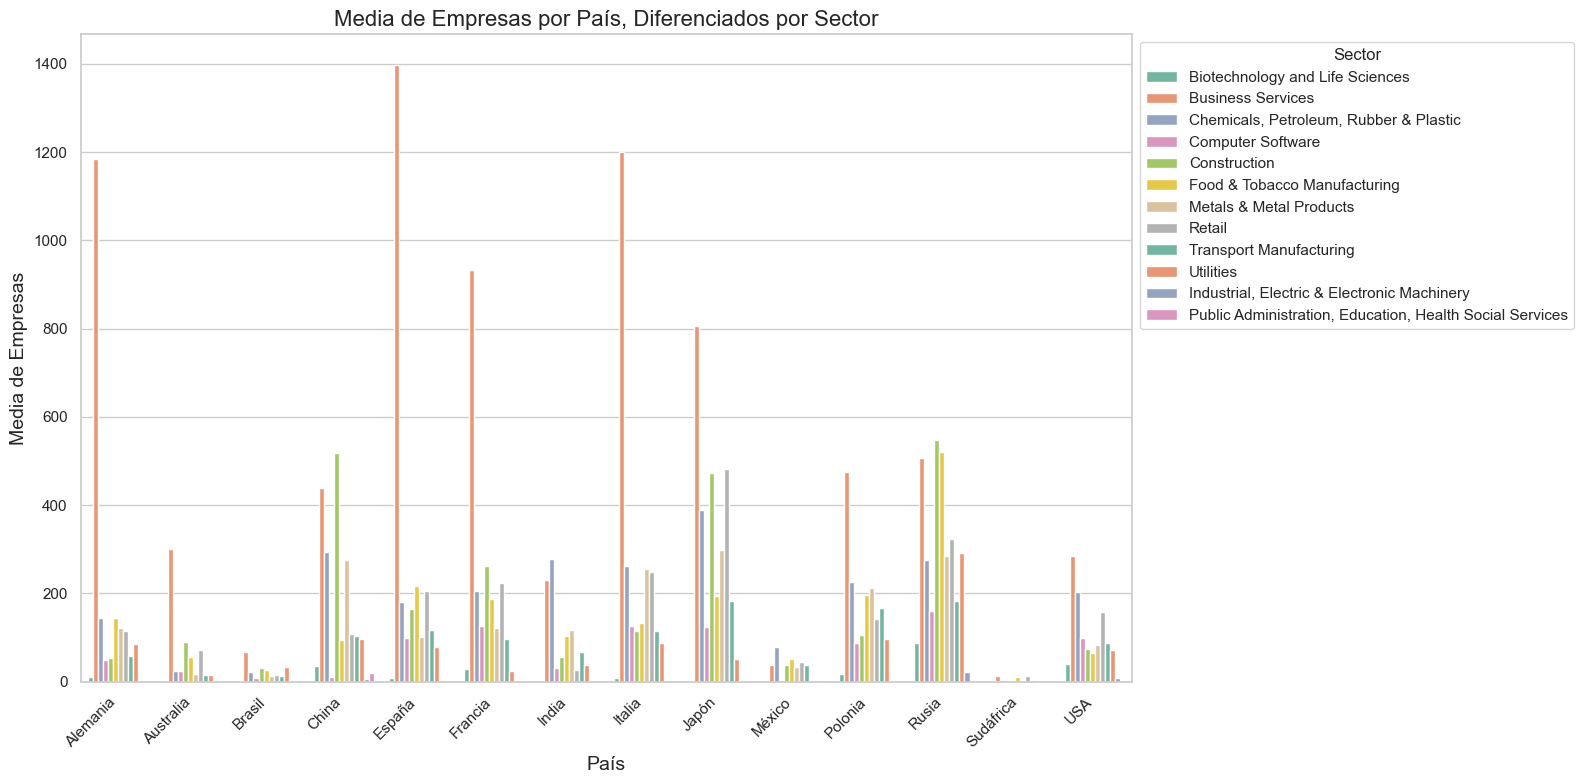

In [28]:
# Calculo la media de empresas por sector y país
sector_media = df.groupby(['country', 'sectors']).size().reset_index(name='media_empresas_sector')

# Configuro el gráfico con seaborn
plt.figure(figsize=(16, 8))
sns.barplot(data=sector_media, x='country', y='media_empresas_sector', hue='sectors', palette='Set2', ci=None)

# Titulos y etiquetas
plt.title('Media de Empresas por País, Diferenciados por Sector', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Media de Empresas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector', loc='upper left', bbox_to_anchor=(1, 1))

# Ajusto de los márgenes para evitar que la leyenda sobresalga
plt.tight_layout()

plt.show()


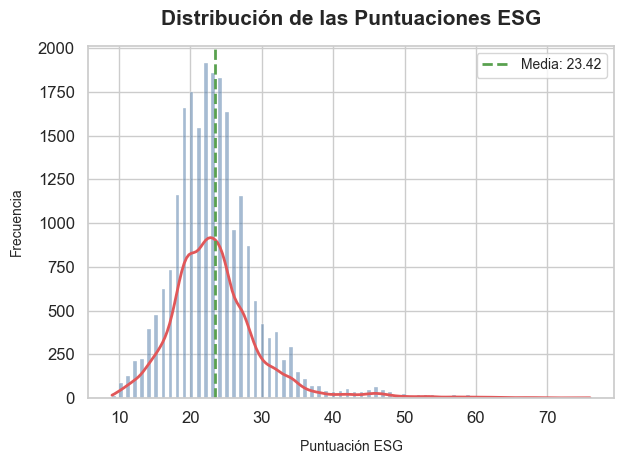

In [29]:
# Distribución de las puntuaciones ESG

# Creo el histograma con una curva KDE suavizada
ax = sns.histplot(data=df, x='esg_score21', kde=True, color='#4e79a7')

# Personalizo la línea KDE después de crear el gráfico
if ax.lines:
    ax.lines[0].set_color('#e15759')
    ax.lines[0].set_linewidth(2)

# Personalizo el titulo y las etiquetas
plt.title('Distribución de las Puntuaciones ESG', fontsize=15, fontweight='bold', pad= 15)
plt.xlabel('Puntuación ESG', fontsize=10, labelpad=10)
plt.ylabel('Frecuencia', fontsize=10, labelpad=10)

# Personalizo los ticks
plt.tick_params(axis='both', which='major', labelsize=12)

# Añado una línea vertical para la media
mean_esg = df['esg_score21'].mean()
plt.axvline(mean_esg, color='#59a14f', linestyle='dashed', linewidth=2, label=f'Media: {mean_esg:.2f}')

# Personalizo la leyenda
plt.legend(fontsize=10, loc='upper right')

# Ajusto los márgenes
plt.tight_layout()

plt.show()

las puntuaciones ESG tienen una distribución sesgada a la derecha, el esg score de las empresas están concentradas en un rango entre los 18 y 25,
es decir la puntuacion de las empresas es debil

In [31]:
df["employees21"].describe()

count    2.257400e+04
mean     3.269904e+03
std      2.511568e+04
min      2.500000e+02
25%      3.450000e+02
50%      5.525000e+02
75%      1.347000e+03
max      2.300000e+06
Name: employees21, dtype: float64

In [32]:
print(list(df.columns))

['esg_score21', 'esg_class21', 'environ_score21', 'environ_class21', 'social_score21', 'social_class21', 'govern_score21', 'govern_class21', 'turnover21', 'country', 'region', 'sectors', 'firm_age', 'group_size', 'activity', 'size_class', 'other_acount', 'legal_event', 'type_event', 'audit_status21', 'ebt21', 'net_income21', 'cash_flow21', 'total_assets21', 'equity21', 'current_ratio21', 'margen_profit', 'gross_profit', 'roe21', 'roce21', 'solvency21', 'employees21', 'hrscore21', 'envscore21', 'businesscore21', 'cominvolvscore21', 'governscore21', 'humanriscore21', 'esg_size21', 'list_status', 'board_members', 'investees', 'publications', 'live_publications', 'pending_publications', 'granted_publications', 'no_current_ liabilities21', 'ono_current_liabilities21', 'o_circu_liabilities21', 'liabilities21', 'inmo_inmat21', 'cf_to_op_income21', 'liquidity_ratio21', 'liquidity_ratio_shareholders21', 'roa_ebit21', 'roa_using_net_income21', 'roe_using_net_income21', 'ebitda21', 'margen_ebitda

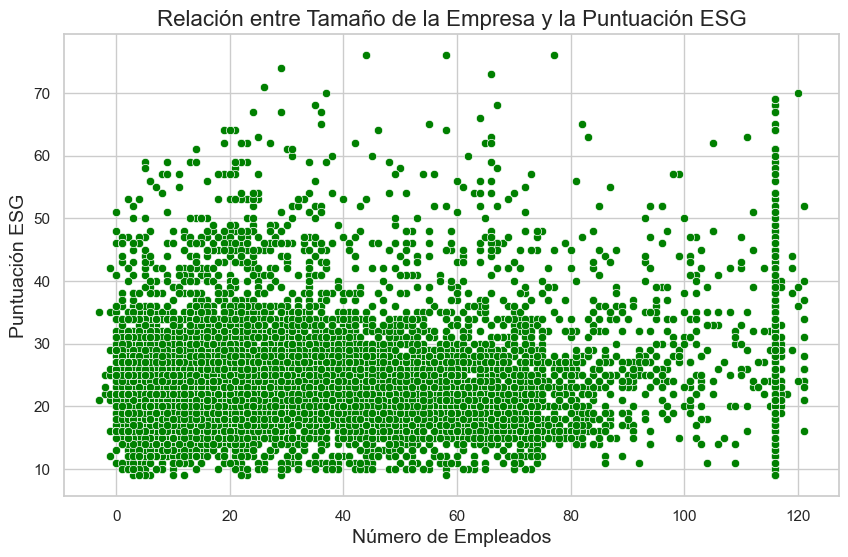

In [33]:
# Relación entre tamaño de la empresa (empleados) y la puntuación ESG
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='firm_age', y='esg_score21', color='green')
plt.title('Relación entre Tamaño de la Empresa y la Puntuación ESG', fontsize=16)
plt.xlabel('Número de Empleados', fontsize=14)
plt.ylabel('Puntuación ESG', fontsize=14)
plt.show()

C:\Users\34651\AppData\Local\Temp\ipykernel_5688\3652055640.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




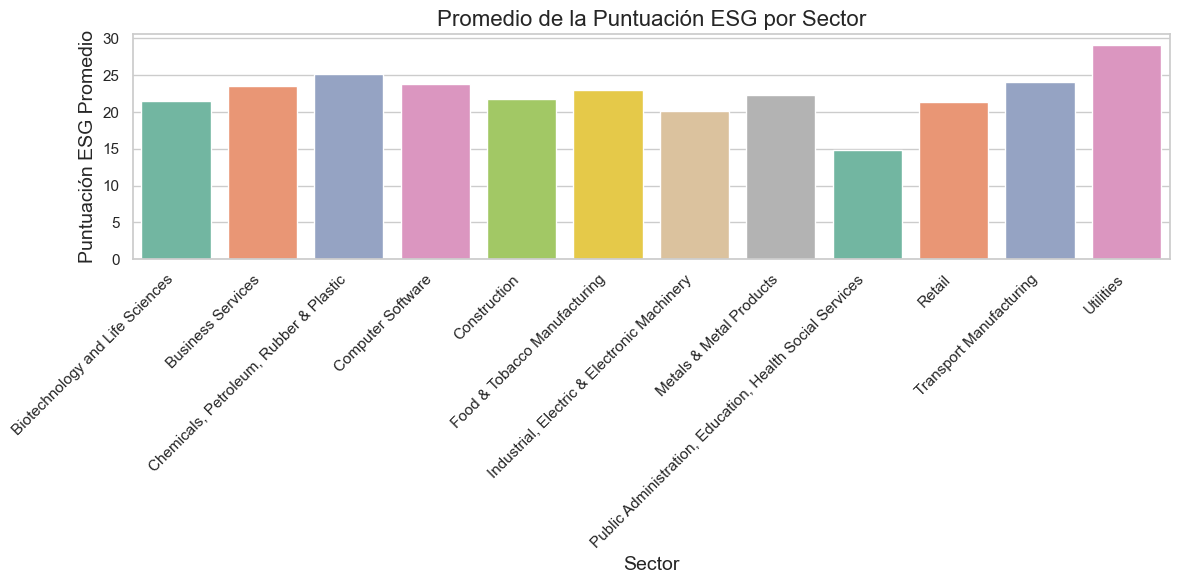

In [34]:
# Promedio de las puntuaciones ESG por sector
sector_esg = df.groupby('sectors')['esg_score21'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sector_esg, x='sectors', y='esg_score21', palette='Set2')
plt.title('Promedio de la Puntuación ESG por Sector', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Puntuación ESG Promedio', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

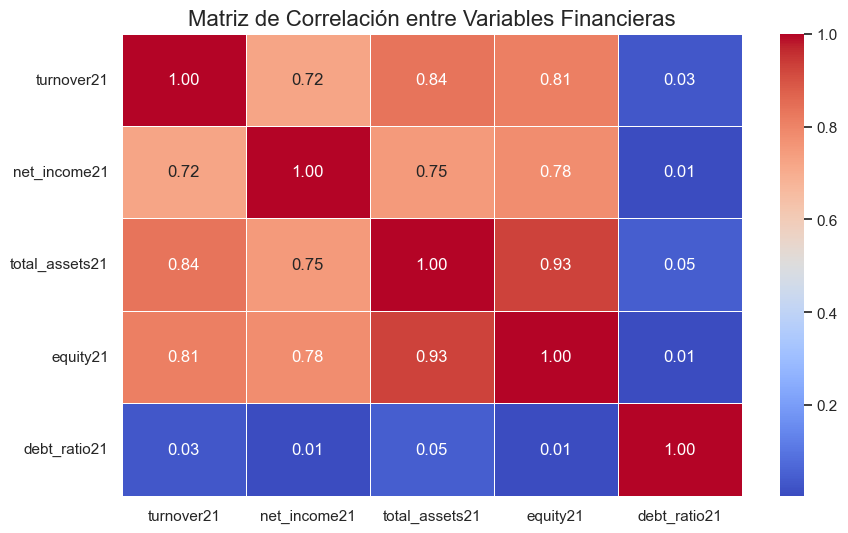

In [35]:
# Correlación entre variables financieras
financial_cols = ['turnover21', 'net_income21', 'total_assets21', 'equity21', 'debt_ratio21']
correlation_matrix = df[financial_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Financieras', fontsize=16)
plt.show()

In [36]:
# Relación entre rentabilidad (EBIT) y la puntuación ESG
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ebit21', y='esg_score21', color='orange')
plt.title('Relación entre Rentabilidad (EBIT) y la Puntuación ESG', fontsize=16)
plt.xlabel('Rentabilidad (EBIT)', fontsize=14)
plt.ylabel('Puntuación ESG', fontsize=14)
plt.show()

ValueError: Could not interpret value `ebit21` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Distribución de la rentabilidad (EBIT) por sectores
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sectors', y='ebit21', palette='Set3')
plt.title('Distribución de la Rentabilidad (EBIT) por Sector', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Rentabilidad (EBIT)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Relación entre deuda (debt ratio) y la puntuación ESG
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='debt_ratio21', y='esg_score21', color='red')
plt.title('Relación entre Deuda y la Puntuación ESG', fontsize=16)
plt.xlabel('Deuda (Debt Ratio)', fontsize=14)
plt.ylabel('Puntuación ESG', fontsize=14)
plt.show()

In [ ]:
# Evolución de la puntuación ESG a lo largo del tiempo
plt.figure(figsize=(12, 6))
df['year'] = df['foundation'].dt.year  # Asegúrate de tener la columna de año
esg_time_trend = df.groupby('year')['esg_score21'].mean().reset_index()

sns.lineplot(data=esg_time_trend, x='year', y='esg_score21', marker='o', color='purple')
plt.title('Evolución de la Puntuación ESG a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Puntuación ESG Promedio', fontsize=14)
plt.show()

In [ ]:
# Promedio de la puntuación ESG por país
country_esg = df.groupby('country')['esg_score21'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=country_esg, x='country', y='esg_score21', palette='Set2')
plt.title('Promedio de la Puntuación ESG por País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Puntuación ESG Promedio', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()